# **House and Bank Loan Status Prediction using ML Models**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('house-loan.csv')

In [5]:
data = pd.DataFrame(data)
data.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [ ]:
# COLUMN DETAILS
================
# Loan_ID : Unique Loan ID

# Gender : Male/ Female

# Married : Applicant married (Y/N)

# Dependents : Number of dependents

# Education : Applicant Education (Graduate/ Under Graduate)

# Self_Employed : Self employed (Y/N)

# ApplicantIncome : Applicant income

# CoapplicantIncome : Coapplicant income

# LoanAmount : Loan amount in thousands of dollars

# Loan_Amount_Term : Term of loan in months

# Credit_History : Credit history meets guidelines yes or no

# Property_Area : Urban/ Semi Urban/ Rural

# Loan_Status : Loan approved (Y/N) this is the target variable

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


## **Exploring the Data**

In [12]:
data.shape

(614, 13)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [18]:
# How 'Credit history' affects the 'Loan status'?
pd.crosstab(data['Credit_History'], data['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


Applicant with credit history as 1 are more eligible for loan than with credit history = 0 (378 vs 7)

##  **Data Visualization**
#### **Exploring Some of the Variable by visualizing them.**

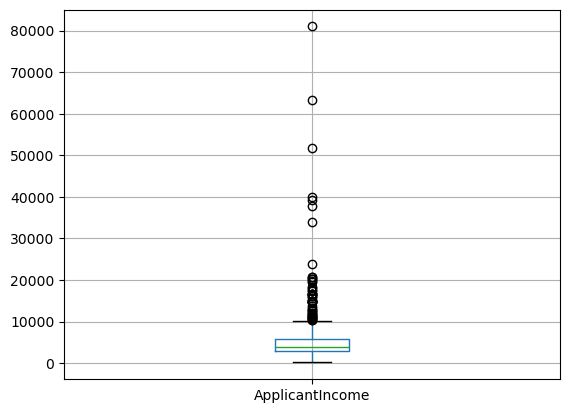

In [22]:
# Applicant Income using boxplot, Lots of Outliers
data.boxplot(column='ApplicantIncome')
plt.show()

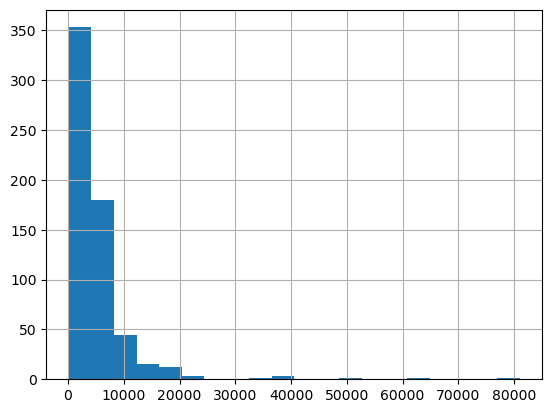

In [24]:
# ApplicantIncome distribution, it is rightly skewed histogram. We have to normalize the values.
data['ApplicantIncome'].hist(bins=20)
plt.show()

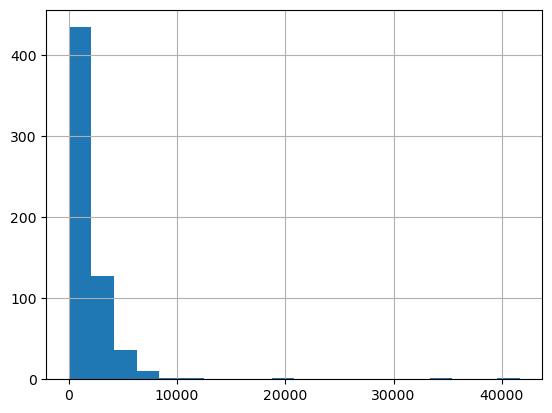

In [26]:
# CoApplicantIncome distribution, it is rightly skewed histogram. We have to normalize the values.
data['CoapplicantIncome'].hist(bins=20)
plt.show()

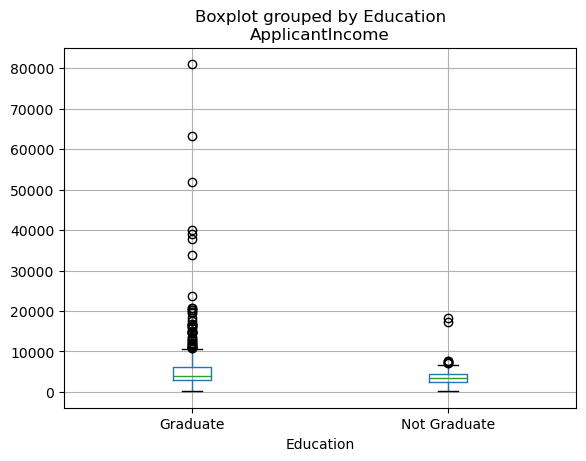

In [28]:
data.boxplot(column='ApplicantIncome', by='Education')
plt.show()

Median Salary doesn't vary too much for Graduate vs Not Graduate.

But Some of the Graduates have very high Salary.This kind of variation is quite common.

But Normalising and Scaling these value is one important step we've to follow and implement for pre-processing.

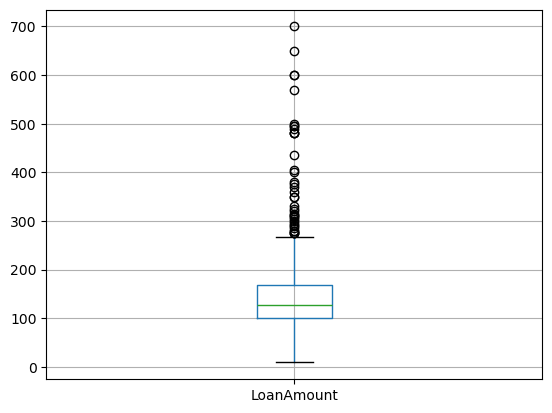

In [31]:
data.boxplot(column='LoanAmount')
plt.show()

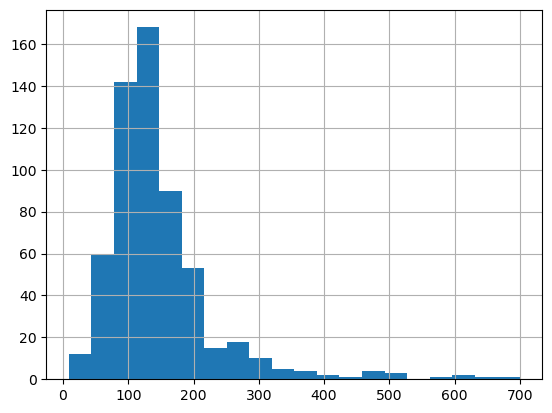

In [33]:
data['LoanAmount'].hist(bins=20)
plt.show()
#Little Right Skewed.

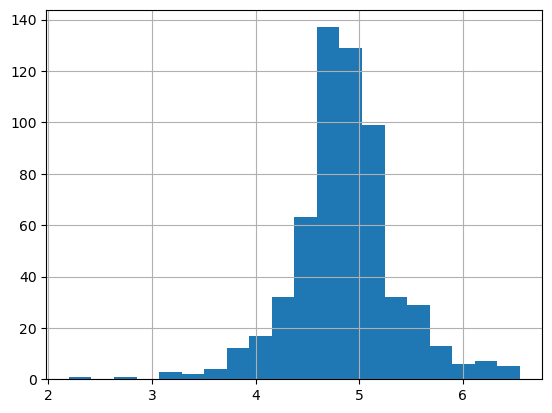

In [35]:
# Normalizing the right skewed data.

data['LoanAmount_log'] = np.log(data['LoanAmount'])

# Visualizing LoanAmount_Log
data['LoanAmount_log'].hist(bins=20)
plt.show()

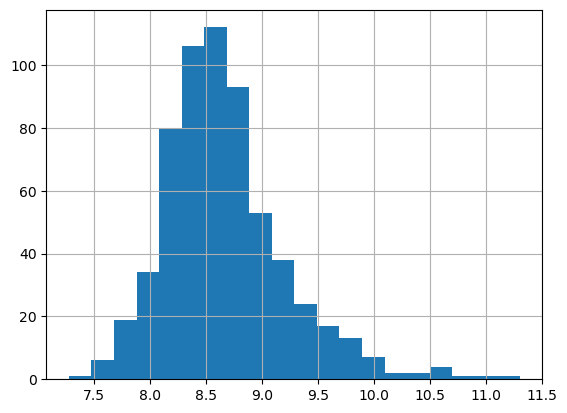

In [37]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

data['TotalIncome_log'] = np.log(data['TotalIncome'])

data['TotalIncome_log'].hist(bins=20)
plt.show()

## **Looking for missing values**

In [40]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

##  **Handling missing values**

In [43]:
#Gender
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [45]:
#Married
data['Married'].fillna(data['Married'].mode()[0], inplace=True)

In [47]:
#Dependent
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

In [49]:
#Self_Employed
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [51]:
#LoanAmount & LoanAmount_log
# It is not a categorical value, but a quantitative value. Hence we will be using mean() to replace the missing value

data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data.LoanAmount_log = data.LoanAmount_log.fillna(data.LoanAmount_log.mean())

In [53]:
#Loan_amount_term
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [55]:
#Credit_history
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [57]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

all missing values are handled

In [60]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


## **Handling Categorical Columns**

In [63]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
215,LP001720,Male,Yes,3+,Not Graduate,No,3850,983.0,100.0,360.0,1.0,Semiurban,Y,4.605170,4833.0,8.483223
294,LP001947,Male,Yes,0,Graduate,No,2383,3334.0,172.0,360.0,1.0,Semiurban,Y,5.147494,5717.0,8.651199
265,LP001875,Male,No,0,Graduate,No,4095,3447.0,151.0,360.0,1.0,Rural,Y,5.017280,7542.0,8.928243
108,LP001379,Male,Yes,2,Graduate,No,3800,3600.0,216.0,360.0,0.0,Urban,N,5.375278,7400.0,8.909235
460,LP002478,Male,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,1.0,Semiurban,Y,5.075174,6166.0,8.726806


In [65]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [67]:
# replace 3+ with 3

data['Dependents'] = data['Dependents'].replace(to_replace="3+",value='3')

In [69]:
data['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

## **Encoding**

In [72]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [73]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.857444,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


## **Feature Scaling**

In [77]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
data[cols] = scalar.fit_transform(data[cols])

In [79]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,0.072991,-0.554487,0.000000,0.273231,1.0,2,1,4.857444,5849.0,8.674026
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.273231,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.273231,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.273231,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.273231,1.0,2,1,4.948760,6000.0,8.699515


ML algorithm which don't need feature scaling are Non-linear algorithms. like Decision Tree, Random Forest, Gradient Bost, Naive Bayes, etc.

Any algorithm, which is not distance based is not affected by feature scaling.

## **Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [85]:
X = data.drop(['Loan_ID','Loan_Status','LoanAmount_log','TotalIncome_log','TotalIncome'], axis=1)
y = data['Loan_Status']

In [87]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.072991,-0.554487,0.000000,0.273231,1.0,2
1,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.273231,1.0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.273231,1.0,2
3,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.273231,1.0,2
4,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.273231,1.0,2


In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


#### **Training multiple models and selecting the one with the highest accuracy for real-world predictions.**

## **Logistic Regression**

In [93]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(f"{model1} accuracy is {accuracy_score(y_test,y_pred)}")
score = cross_val_score(model1,X,y,cv=5)
print(f"{model1} Avg cross val score is {np.mean(score)}")

LogisticRegression() accuracy is 0.7886178861788617
LogisticRegression() Avg cross val score is 0.8045715047314408


## **SVM**

In [96]:
from sklearn import svm

model2 = svm.SVC()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(f"{model2} accuracy is {accuracy_score(y_test,y_pred)}")
score = cross_val_score(model2,X,y,cv=5)
print(f"{model2} Avg cross val score is {np.mean(score)}")

SVC() accuracy is 0.7804878048780488
SVC() Avg cross val score is 0.7964147674263627


## **Decision Tree**

In [99]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
print(f"{model3} accuracy is {accuracy_score(y_test,y_pred)}")
score = cross_val_score(model3,X,y,cv=5)
print(f"{model3} Avg cross val score is {np.mean(score)}")

DecisionTreeClassifier() accuracy is 0.6910569105691057
DecisionTreeClassifier() Avg cross val score is 0.7116886578701853


## **HyperParameter Tuning**
Using Randomized Search CV - it solve the drawbacks of GridSearchCV, as it goes thru only fixed no. of hyper parameter settings. it moves within a grid in random fashion to find best set of hyper parameter.

In [102]:
from sklearn.model_selection import RandomizedSearchCV

###  **Logistic Regression**

In [105]:
param_grid = {
    "C": np.logspace(-4, 4, 20),# Regularization strength
    "solver": ['liblinear','saga','lbfgs']
}
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                   param_distributions = param_grid,
                   n_iter=20, cv=5, verbose=True)

In [107]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'saga',
                                                   'lbfgs']},
                   verbose=True)

In [108]:
rs_log_reg.best_score_, rs_log_reg.best_params_

(0.8078368652538984, {'solver': 'saga', 'C': 0.08858667904100823})

###  **SVC (Support Vector Classifier)**

In [112]:
svc_grid = {'C':[0.25,0.50,0.75,1],
            "kernel":["linear",'poly','sigmoid']}

rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions = svc_grid,
                  cv=5,
                  n_iter=20,
                  verbose=True)

rs_svc.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear', 'poly',
                                                   'sigmoid']},
                   verbose=True)

In [114]:
rs_svc.best_score_, rs_svc.best_params_

(0.809462881514061, {'kernel': 'linear', 'C': 0.25})

## **Decision Tree**

In [117]:
dtree_grid = {
    "max_depth": [3, 5, 10, None],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
    "criterion": ["gini", "entropy"],  
    "max_features": [None, "sqrt", "log2"]  
}
rs_dtree = RandomizedSearchCV(DecisionTreeClassifier(),  
    param_distributions=dtree_grid,
    cv=5,
    n_iter=20,
    verbose=True,
    random_state=42,
    n_jobs=-1
)
rs_dtree.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=True)

In [119]:
rs_dtree.best_score_, rs_dtree.best_params_

(0.8029588164734107,
 {'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': None,
  'max_depth': 3,
  'criterion': 'entropy'})

In [121]:
LogisticRegression score Before Hyperparameter Tuning: 80.45
LogisticRegression score after Hyperparameter Tuning: 80.78
    
------------------------------------------------------
SVC score Before Hyperparameter Tuning: 79.38
SVC score after Hyperparameter Tuning: 80.66
    
--------------------------------------------------------
RandomForestClassifier score Before Hyperparameter Tuning: 68.76
RandomForestClassifier score after Hyperparameter Tuning: 79.66 

SyntaxError: invalid syntax (2387175299.py, line 1)

Selecting Logistic Regression for Production with 80.78 accuracy. Earlier it was Logistic Regression with 80.45.

## **Save The Model**
**Before we save our best model Logistic Regression for Production, we've to train our Model on the entire dataset with best parameters that we've just found.**

In [126]:
log_reg = LogisticRegression(
    C=1.0,               # Regularization strength (inverse of lambda)
    solver='liblinear',  # Solver for small datasets & L1/L2 penalty support
    penalty='l2',        # L2 regularization (default)
    max_iter=1000        # Increased iterations for convergence
)

log_reg.fit(X, y)

LogisticRegression(max_iter=1000, solver='liblinear')

**Saving our model, so that we've don't have to train it again using joblib**.

In [133]:
import pickle

In [135]:
# saving our model by passing an instance of our model and giving it a name.

with open("home_model.pkl", "wb") as file:
    pickle.dump(log_reg, file)

In [141]:
import pandas as pd

df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [143]:
result = log_reg.predict(df)

In [145]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved


In [137]:
import pickle

# Ensure you're loading the correct file
with open("home_model.pkl", "rb") as file:
    home_model = pickle.load(file)

# Check if the model has the `.predict()` method
if not hasattr(home_model, "predict"):
    raise TypeError("Loaded `home_model` is not a valid ML model.")


In [139]:
print("Type of home_model:", type(home_model))

# Check if it is an actual ML model and has `predict` method
if not hasattr(home_model, "predict"):
    raise TypeError("Loaded `home_model` is not a valid ML model.")


Type of home_model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
